In [1]:
import ROOT
from ROOT import gStyle
from ROOT import gPad
gStyle.SetOptStat(0)

Welcome to JupyROOT 6.28/00


In [2]:
#retrieving a file taken with 4 sicnt of the new type in 8ns coincidence 
myFile_s = ROOT.TFile.Open("/Users/bertabeltran/SMUT/data/COIN_vs_back/comp_coin_vs_back_COIN_80fCLSB_15LSB/FILTERED/HcompassF_comp_coin_vs_back_COIN_80fCLSB_15LSB_20240320_181116.root")

In [3]:
myFile_s.ls()

TFile**		/Users/bertabeltran/SMUT/data/COIN_vs_back/comp_coin_vs_back_COIN_80fCLSB_15LSB/FILTERED/HcompassF_comp_coin_vs_back_COIN_80fCLSB_15LSB_20240320_181116.root	
 TFile*		/Users/bertabeltran/SMUT/data/COIN_vs_back/comp_coin_vs_back_COIN_80fCLSB_15LSB/FILTERED/HcompassF_comp_coin_vs_back_COIN_80fCLSB_15LSB_20240320_181116.root	
  KEY: TDirectoryFile	Energy;1	Energy
  KEY: TDirectoryFile	Time;1	Time
  KEY: TDirectoryFile	PSD;1	PSD
  KEY: TDirectoryFile	PSD_E;1	PSD_E
  KEY: TTime	RealTime_0;1	object title
  KEY: TTime	LiveTime_0;1	object title
  KEY: TTime	RealTime_1;1	object title
  KEY: TTime	LiveTime_1;1	object title
  KEY: TTime	RealTime_2;1	object title
  KEY: TTime	LiveTime_2;1	object title
  KEY: TTime	RealTime_3;1	object title
  KEY: TTime	LiveTime_3;1	object title


In [4]:
dir_s = myFile_s.GetDirectory("Energy");

In [5]:
dir_s.ls()

TDirectoryFile*		Energy	Energy
 KEY: TH1D	_F_EnergyCH0@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_0;1	object title
 KEY: TH1D	_F_EnergyCH1@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_1;1	object title
 KEY: TH1D	_F_EnergyCH2@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_2;1	object title
 KEY: TH1D	_F_EnergyCH3@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_3;1	object title


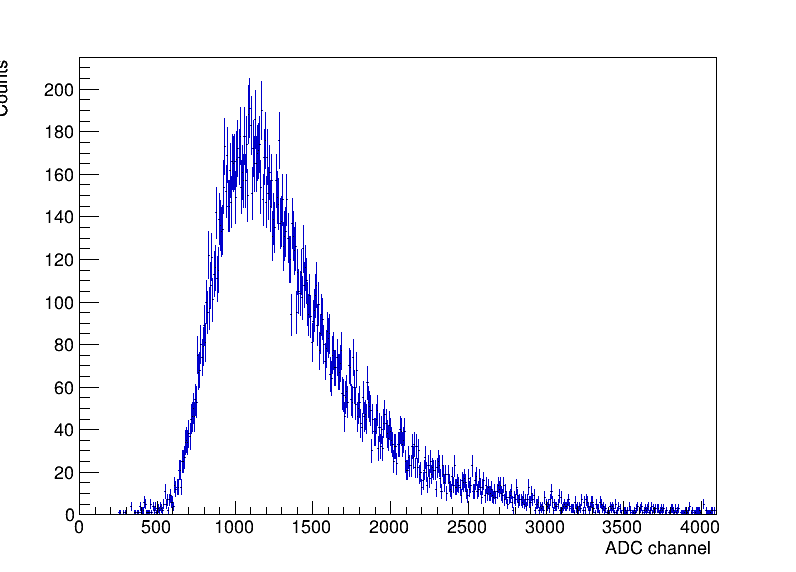

In [6]:
hist_s = dir_s.Get("_F_EnergyCH0@DT5751_1615;1")
hist_s.Sumw2()
hist_s.Rebin(7)
cs = ROOT.TCanvas("cs"," ",800,600)
hist_s.Draw()
cs.Draw()

TDirectoryFile*		Energy	Energy
 KEY: TH1D	_F_EnergyCH0@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_0;1	object title
 KEY: TH1D	_F_EnergyCH1@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_1;1	object title
 KEY: TH1D	_F_EnergyCH2@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_2;1	object title
 KEY: TH1D	_F_EnergyCH3@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_3;1	object title


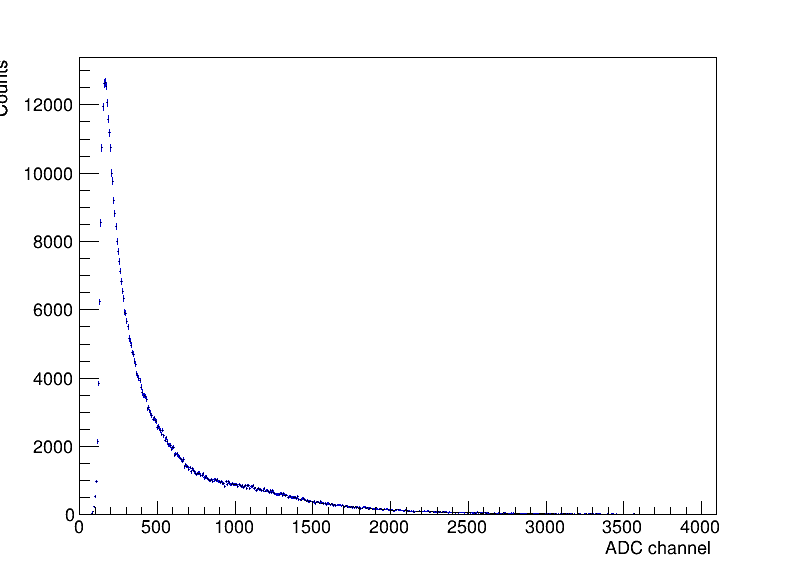

In [7]:
#now we retrieve the data collected without coincidences 
myFile_D = ROOT.TFile.Open("/Users/bertabeltran/SMUT/data/COIN_vs_back/comp_coin_vs_back_BACK_80fCLSB_15LSB_long/FILTERED/HcompassF_comp_coin_vs_back_BACK_80fCLSB_15LSB_long_20240322_105125.root")
dir_D = myFile_D.GetDirectory("Energy");
dir_D.ls()
hist_D = dir_D.Get("_F_EnergyCH0@DT5751_1615")
hist_D.Sumw2()
hist_D.Rebin(7)
cd = ROOT.TCanvas("cd"," ",800,600)
hist_D.Draw()
cd.Draw()

Info in <TCanvas::Print>: pdf file /Users/bertabeltran/SMUT/data/COIN_vs_back/Coin_vs_Back_chan0.pdf has been created


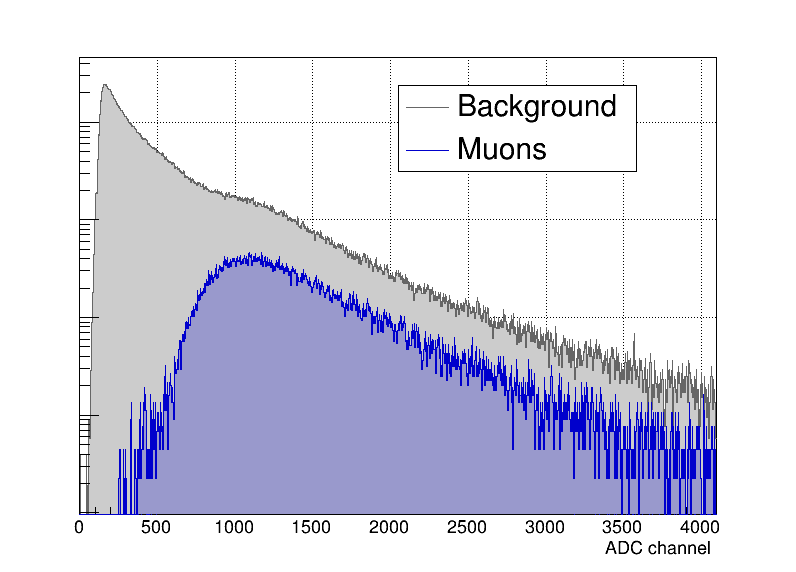

In [8]:

c = ROOT.TCanvas("c","",800,600)
gPad.SetGrid();
gPad.SetLogy();

#background 
hist_D.SetLineColor(13)
hist_D.SetFillColor(17)
hist_D.SetNormFactor(1)
hist_D.GetYaxis().SetTitleOffset(999) #1.2
hist_D.GetYaxis().SetLabelOffset(999);
hist_D.GetYaxis().SetLabelSize(0);
hist_D.Draw("h")
#c.SetLogy()
gStyle.SetOptStat(0)


# coincidence 
#hist_s.SetFillColor(4)
#hist_bkg.GetYaxis().SetRangeUser(0, 0.05)#
hist_s.SetNormFactor(0.05)
hist_s.Draw("same h")


leg = ROOT.TLegend(.5,.7,.8,.85)
#leg.SetHeader("Channel 0");
#leg.SetBorderSize(0);
leg.AddEntry(hist_D,"Background","L")
leg.AddEntry(hist_s,"Muons ","L")

leg.Draw()

# tex=ROOT.TLatex(0.1,0.93,"Rectangle vs D-Shaped Scintillator (different relative normalization)");
# tex.SetNDC();
# tex.SetTextSize(0.04);
# tex.Draw();

c.Draw()
c.SaveAs("/Users/bertabeltran/SMUT/data/COIN_vs_back/Coin_vs_Back_chan0.pdf");